In [66]:
from maximumflow import MaximumFlow
from kthflow import kthFlow
from matching import MaximumMatching
from matching2 import MaximumMatching2


I implemented four classes in other ***.py*** files. What they do are:
- Kthflow: Find and visualize kth augmenting path.
- maximum flow: Find and visualize maximum flow and minimum cut.
- matching: maximum matchings implemented with maximum flow.
- matching2: maximum matchings implemented with alternative path.

Let $G = (V, E)$ be a network with source $s$ and sink $t$. Let $f$ be a flow in $G$. Define residual capacity $c_f(u, v)$ by
$$
c_f (u, v) =
\begin{cases}
c(u, v) - f(u, v) & \quad \text{if $(u, v) \in E$}\\ 
f(u, v) & \quad \text{if $(v, u)\in E$}\\
0 & \quad \text{otherwise}
\end{cases}
$$
A augmenting path is a simple path in the residual graph and along the edges whose residual capacity is positive. I use BFS to search path with residual capacity from $s$ to $t$ and maintain a list $parent$ to map each node to previous node. Once we arrive $t$, the augmenting $path$ we found is
$$
path = [s, \cdots, parent[parent[t]], parent[t], t]
$$
And the flow we can add along the augmenting path is:
$$
f' = \min\{c_f(u, v)| (u, v) \in path \}
$$
And we adjust the residual network:
$$
c_{f + f'} (u, v) =
\begin{cases}
c(u, v) - f(u, v) - f' & \quad \text{if $(u, v) \in E$ and $(u, v) \in path$}\\ 
f(u, v) + f' & \quad \text{if $(v, u)\in E$ and $(u,v) \in path$}\\
c(u, v) & \quad \text{otherwise}
\end{cases}
$$
The idea of residual network is increasing the flow decreases the flow that can go through the path in the future. Pushing flow on reverse edge in residual network means decreasing the flow in the network. It's known as ***cancellation***.

Here is an example of ***cancelation***.

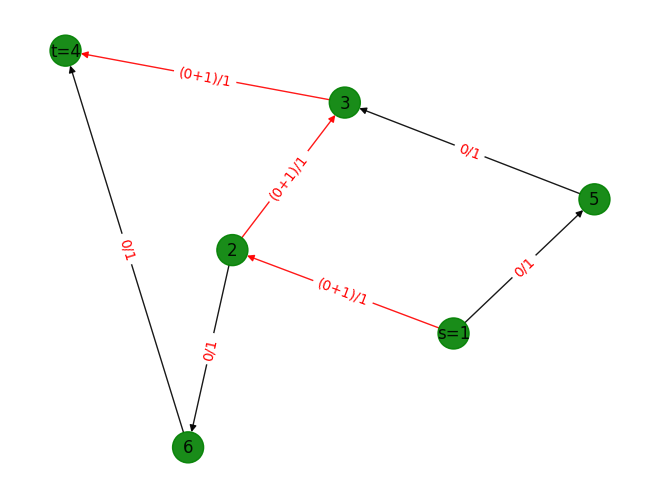

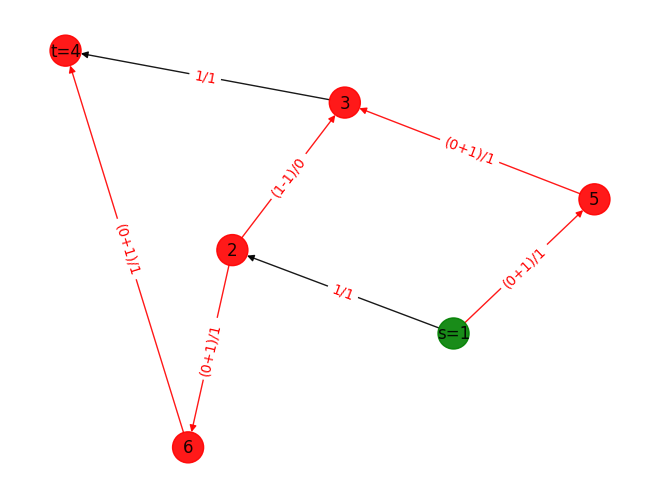

In [67]:
maximumflow = kthFlow(6)
maximumflow.add_edge(1, 2, 1)
maximumflow.add_edge(1, 5, 1)
maximumflow.add_edge(2, 3, 1)
maximumflow.add_edge(5, 3, 1)
maximumflow.add_edge(2, 6, 1)
maximumflow.add_edge(3, 4, 1)
maximumflow.add_edge(6, 4, 1)
maximumflow.print_next_result(1, 4)
maximumflow.print_next_result(1, 4)

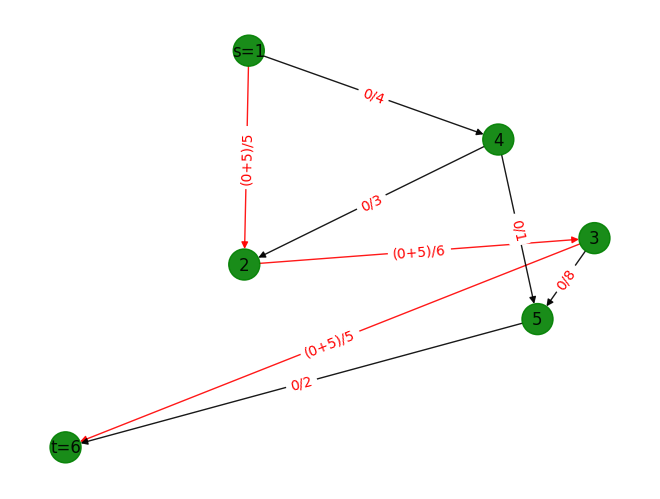

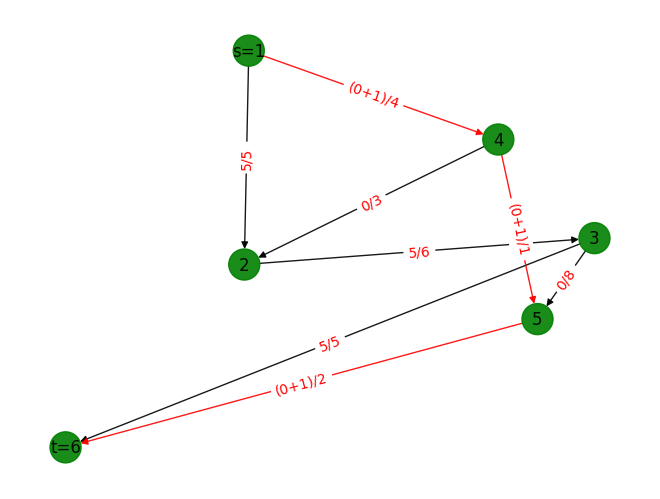

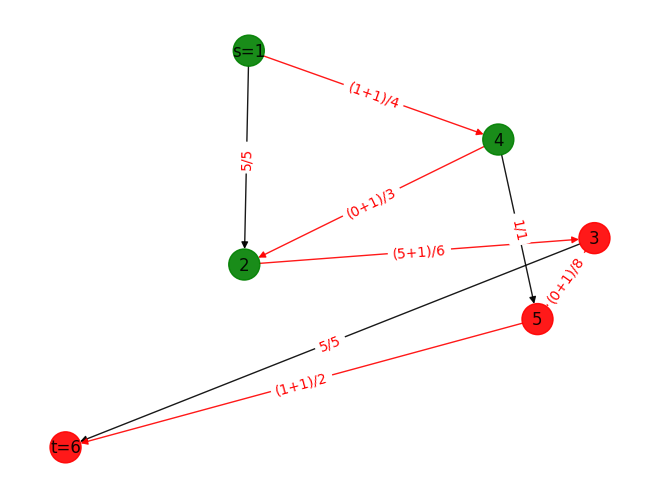

In [68]:
maximumflow = kthFlow(6)
maximumflow.add_edge(1, 2, 5)
maximumflow.add_edge(1, 4, 4)
maximumflow.add_edge(4, 2, 3)
maximumflow.add_edge(2, 3, 6)
maximumflow.add_edge(4, 5, 1)
maximumflow.add_edge(3, 5, 8)
maximumflow.add_edge(5, 6, 2)
maximumflow.add_edge(3, 6, 5)
maximumflow.print_next_result(1, 6)
maximumflow.print_next_result(1, 6)
maximumflow.print_next_result(1, 6)

Let $G = (V, E)$ and let $f(s, t)$ be the maximum flow. In this case, There is no augmenting path from $s$ to $t$. Let
$$
S = \{v \in V| \text{There exists a augmenting path from $s$ to $v$}\}
$$
and $T = V - S$. 

$t \notin S$, otherwise, there exists a augmenting path from $s$ to $t$.

Recall the definition of residule network. To make sure there is no augmenting path from any nodes of $S$ to any nodes of $T$. All capacity must be used for the edge from $S$ to $T$,  That is 
$$
f(u, v) = cap(u, v) \text{   If $u\in S$ and $v\in T$}
$$ 
and there can't be flow from $T$ to $S$. Otherwise, it can be canceled
$$
f(u, v) = 0 \text{   If $u\in T$ and $v\in S$}
$$
Then we have equality
$$
f(s, t) = \sum_{u\in S, v\in T} f(u, v) - \sum_{u\in T, v\in S} f(u, v)  = \sum_{u\in S, v\in T} cap(u, v) = c(S, T)
$$
Thus, we found a cut $c(S, T)$ and $c(S, T) = f(s, t)$.

After maximum flow is found, I use BFS to find reachable nodes from $s$ and mark reachable nodes with green color and unreachable nodes with red color.

The maximum flow is 6


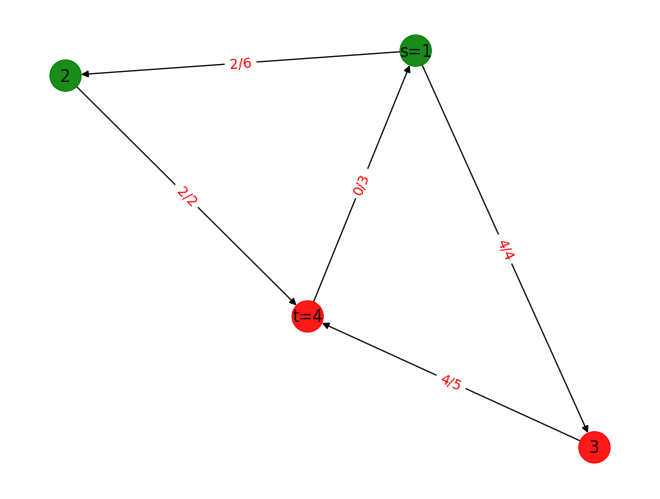

In [69]:
solver = MaximumFlow(4)
solver.add_edge(1, 2, 3)
solver.add_edge(1, 2, 3)
solver.add_edge(2, 4, 2)
solver.add_edge(1, 3, 4)
solver.add_edge(3, 4, 5)
solver.add_edge(4, 1, 3)
solver.print_result(1, 4)

The maximum flow is 7


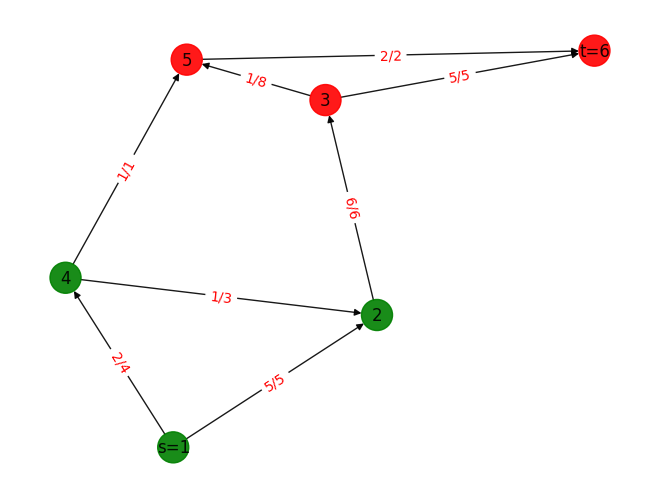

In [70]:
maximumflow = MaximumFlow(6)
maximumflow.add_edge(1, 2, 5)
maximumflow.add_edge(1, 4, 4)
maximumflow.add_edge(4, 2, 3)
maximumflow.add_edge(2, 3, 6)
maximumflow.add_edge(4, 5, 1)
maximumflow.add_edge(3, 5, 8)
maximumflow.add_edge(5, 6, 2)
maximumflow.add_edge(3, 6, 5)
maximumflow.print_result(1, 6)


To find the maximum matchings. we add two new nodes to the graph: a source and a sink. We also add edges from the source to each leaft node and from each right node to the sink. After this, the problem of finding maximum matchings becomes the problem of maximum flow from source to sink

A glimpse of implementation of MaximumMatching class:

```python
    def __init__(self,...):
        ...
        self.flow_solver = MaximumFlow(self.nodes_num + 1)
        # We add edges from 0 to every node in set1 with capacity 1
        for i in range(1, set1_num + 1):
            self.flow_solver.add_edge(0, i, 1)
        # and edges from j from set2 to node nodes_num + 1 with capacity 1;
        for i in range(set1_num + 1, self.nodes_num + 1):
            self.flow_solver.add_edge(i, self.nodes_num + 1, 1)


    def max_maching(self):
        # We find the maximum matching by find the flow from node "0" to node "nodes_num + 1"
        return self.flow_solver.maximumflow(0, self.nodes_num + 1)
```

The maximum matching is 4


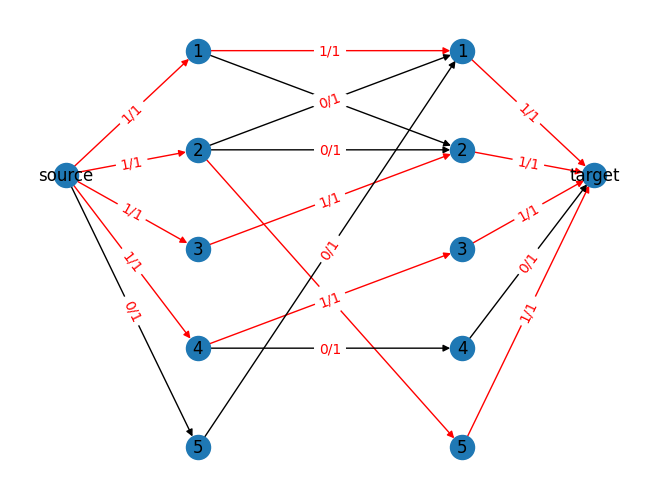

In [71]:
maxmatch = MaximumMatching(5, 5)
maxmatch.add_edge(1,1)
maxmatch.add_edge(1,2)
maxmatch.add_edge(2,1)
maxmatch.add_edge(3,2)
maxmatch.add_edge(2,2)
maxmatch.add_edge(2,5)
maxmatch.add_edge(4,3)
maxmatch.add_edge(4,4)
maxmatch.add_edge(5,1)

maxmatch.print_result()


There is an alternative way to find the maximum matching. Define the following:
- An alternating path is a path in which the eges alternately belong/do not belong to the matching.
- An augmenting path is an alternating path whose initial and final nodes do not belong in the matching.

And [Berge's theorem](https://en.wikipedia.org/wiki/Berge%27s_theorem) tells us a matching $M$ in a graph $G$ is maximum if and only if there is no augmenting path.

To find a augmenting path, for each unmatched node $a$ on the left, there are three cases 
1. There exists an edges linked to an unmatched node on the right.
2. There exists an alternative path $a$ - $b'$ - $c$ and an alternative path from $c$ to an unmatched point.
3. There is no augmenting path.

The first case is trivial.

To find augmenting path in the second case. I create a list named 'match' that record matchings for the right nodes.
```python
def search(a: node):
    for b that (a, b) in Edges:
        if b unmatched:  #first case
            match[b] = a
            return True
        else if search(match[b]): #second case: if there exists a alternative path starting from match[b]
            match[b] = a
            return True
    
    return False # case no augmenting path found from node a

    # Remark: To prevent infinite recursion I also use a list to record if a left node is searched, which makes sure we only search alternative path from each left node only once during the recursion.
    
```


In the following case the left node 5 is not matched. And we can find path 5-2'-4 We can find a match for 5 if we add an edge from 4 to 4'

The maximum matchings is 4


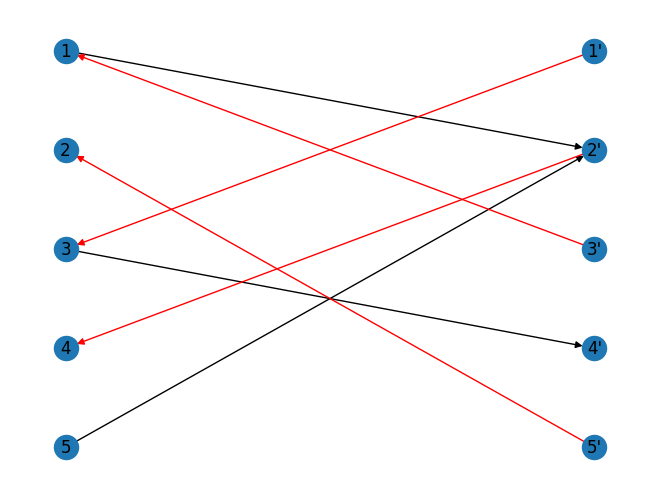

In [72]:

maxmatch = MaximumMatching2(5, 5)
maxmatch.add_edge(1,3)
maxmatch.add_edge(3,1)
maxmatch.add_edge(1,2)
maxmatch.add_edge(3,4)
maxmatch.add_edge(4,2)
maxmatch.add_edge(5,2)
maxmatch.add_edge(2,5)
maxmatch.print_result()

The maximum matchings is 5


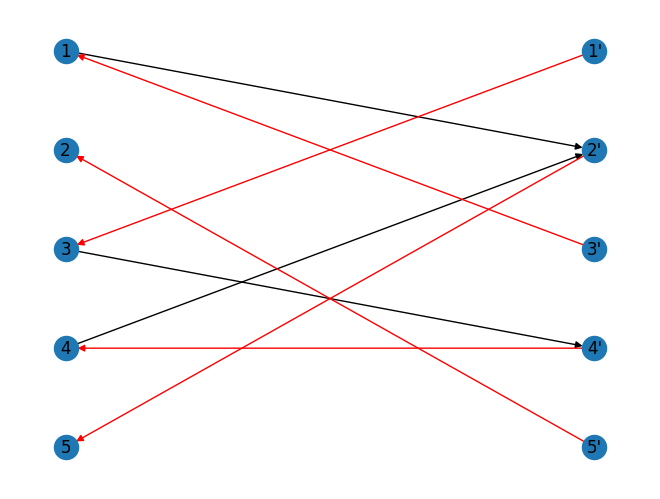

In [73]:
maxmatch.add_edge(4,4)
maxmatch.print_result()